# !WARNING!

In the original study, participants were shown a pair of faces in each trial: one face masculinised and one feminised. They then had to choose their preferred face. Which side the masculinised face was on (left or right) was randomised between trials.

In these notebooks, this dataset was analysed under the false assumption that the variable "side_of_response" corresponds to the participants choice of the "left" or "right" face, and therefore needed firstly to be mapped to a new variable, indicating whether the participant chose a masculine or feminine face - variable: "chose_masc". The mapping to "chose_masc" was created by viewing the masculinised/feminised images (not provided) to see which side (left or right) corresponded to the masculine or feminine.

**However the variable "side_of_response" (left=0, right=1) actually already corresponds to the variable "participant chose masculinised face" (feminised=0, masculinised=1).** Therefore the 3 analyses in the notebooks:  
* 0.1 Cleaning and Exploring Data (WRONG DATA).ipynb
* 0.2 Testing priming group independence (WRONG DATA).ipynb
* 0.3 Masculinity over 'time' (WRONG DATA).ipynb  

Are working with incorrectly interpreted data, and thus their analyses are also incorrect. 

The correct dataset and analyses are included in the notebooks:
* 1. Cleaning and Exploring Data.ipynb
* 2. Masculinity preferences by priming group.ipynb
* 3. Masculinity over 'time'.ipynb  
* 4. Modelling the data.ipynb

However these original incorrect notebooks are included within the project files for transparency, and to discourage similar mistakes being made by others re-using the dataset!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Importing and pre-processing the data

In [3]:
# importing the data
data = pd.read_csv("../Main Study (Face)/main_study_face_data_modified_WRONG.csv")

In [4]:
# converting the boolean variable to integers, so it can be plotted
data["chose_masc_numerical"] = data["chose_masc"].map({True: 1, False: 0})

In [5]:
# converting the numerical prime conditions to the actual named condition, for clarity
data["prime_condition_names"] = data["prime_condition"].map({1:"neutral",
                                                             2:"male/male",
                                                             3:"male group",
                                                             4:"male/female",
                                                             5:"pathogen"})                                   

In [27]:
# converting the pre/post prime indicators to words, for clarity
data["pre_post_prime_name"] = data["pre_post_prime"].map({0:"pre-prime",     
                                                          1:"post-prime"})

In [28]:
data.head()

,participant_id,trial_number,pre_post_prime,side_of_response,image,prime_condition,masc_side,chose_masc,chose_masc_numerical,prime_condition_names,pre_post_prime_name
0,11,2,0,0,Slide11.bmp,1,0,True,1,neutral,pre-prime
1,11,3,0,1,Slide9.bmp,1,1,True,1,neutral,pre-prime
2,11,4,0,0,Slide5.bmp,1,1,False,0,neutral,pre-prime
3,11,5,0,1,Slide1.bmp,1,1,True,1,neutral,pre-prime
4,11,6,0,1,Slide18.bmp,1,1,True,1,neutral,pre-prime


In [29]:
# creating a dataset containing only the post-prime values
only_post = data[data["pre_post_prime"]==1]

In [30]:
# creating a dataset containing only the pre-prime values
only_pre = data[data["pre_post_prime"]==0]

## Are there any differences in masculinity preferences between the priming groups, pre-prime?
(if no, then suggests we can analyse only the post-prime data alone later)

In [31]:
only_pre.groupby("prime_condition_names")["chose_masc_numerical"].describe()

,count,mean,std,min,25%,50%,75%,max
prime_condition_names,,,,,,,,
male group,1198.0,0.585142,0.492903,0.0,0.0,1.0,1.0,1.0
male/female,1283.0,0.556508,0.496990,0.0,0.0,1.0,1.0,1.0
male/male,1251.0,0.549161,0.497776,0.0,0.0,1.0,1.0,1.0
neutral,1281.0,0.545667,0.498105,0.0,0.0,1.0,1.0,1.0
pathogen,1204.0,0.583056,0.493258,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='prime_condition_names'>

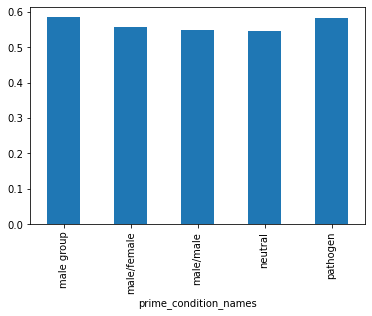

In [32]:
only_pre.groupby("prime_condition_names")["chose_masc_numerical"].describe()["mean"].plot.bar()

Groups 3 and 5 have a slightly increased preference for masculinity compared to the other groups. As this is pre-prime, we should not expect to see any differences, unless the group assignments failed to be random enough.

In [33]:
# Doing a chi squared test of independence
pre_contingency = pd.crosstab(only_pre["prime_condition_names"], only_pre["chose_masc_numerical"])
pre_contingency

chose_masc_numerical,0,1
prime_condition_names,,
male group,497,701
male/female,569,714
male/male,564,687
neutral,582,699
pathogen,502,702


In [34]:
chi2_pre, p_pre, dof_pre, expected_pre = stats.chi2_contingency(pre_contingency, correction=False)

In [35]:
# the p value is not significant - therefore all of the groups assignments seem evenly distributed
print(chi2_pre, p_pre)

7.110027090471261 0.1301867864624772


In [36]:
pd.DataFrame(expected_pre)

,0,1
0,522.980859,675.019141
1,560.087180,722.912820
2,546.117742,704.882258
3,559.214090,721.785910
4,525.600129,678.399871


## Is there a significant difference in the masculinity preferences for each of the assigned groups, post-prime? (As tested in the study?)

In [37]:
only_post.groupby("prime_condition_names")["chose_masc_numerical"].describe()

,count,mean,std,min,25%,50%,75%,max
prime_condition_names,,,,,,,,
male group,1247.0,0.555734,0.497083,0.0,0.0,1.0,1.0,1.0
male/female,1321.0,0.560182,0.496553,0.0,0.0,1.0,1.0,1.0
male/male,1301.0,0.561875,0.496347,0.0,0.0,1.0,1.0,1.0
neutral,1332.0,0.563814,0.496097,0.0,0.0,1.0,1.0,1.0
pathogen,1246.0,0.578652,0.493973,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='prime_condition_names'>

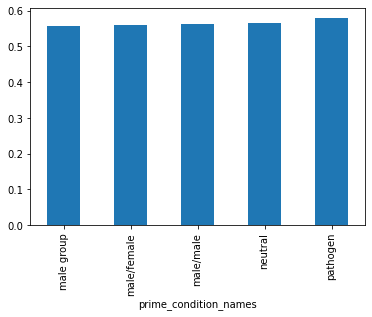

In [38]:
only_post.groupby("prime_condition_names")["chose_masc_numerical"].describe()["mean"].plot.bar()

In [39]:
# Doing a chi squared test of independence
post_contingency = pd.crosstab(only_post["prime_condition_names"], only_post["chose_masc_numerical"])
post_contingency

chose_masc_numerical,0,1
prime_condition_names,,
male group,554,693
male/female,581,740
male/male,570,731
neutral,581,751
pathogen,525,721


In [40]:
chi2_post, p_post, dof_post, expected_post = stats.chi2_contingency(post_contingency, correction=False)

In [41]:
# There is absolutely no indication of any difference between the priming groups, very large p value
print(chi2_post, p_post)

1.5366256988984515 0.8201344819097213


In [42]:
pd.DataFrame(expected_post)

,0,1
0,543.712890,703.287110
1,575.978129,745.021871
2,567.257794,733.742206
3,580.774314,751.225686
4,543.276873,702.723127


## Is there any difference in the means between combined pre/post prime and condition groups?

In [44]:
all_contingency = pd.crosstab([data["prime_condition_names"], data["pre_post_prime_name"]], data["chose_masc_numerical"])
all_contingency.index = list(all_contingency.index)
all_contingency

chose_masc_numerical,0,1
"(male group, post-prime)",554,693
"(male group, pre-prime)",497,701
"(male/female, post-prime)",581,740
"(male/female, pre-prime)",569,714
"(male/male, post-prime)",570,731
"(male/male, pre-prime)",564,687
"(neutral, post-prime)",581,751
"(neutral, pre-prime)",582,699
"(pathogen, post-prime)",525,721
"(pathogen, pre-prime)",502,702


In [45]:
chi2_all, p_all, dof_all, expected_all = stats.chi2_contingency(all_contingency, correction=False)

In [46]:
# Even looking across all combinations of different priming groups, and pre and post prime, there is no indication of any differences in masculinity preference between the groups,
# regardless if you are pre/post prime, regardless of what priming group was assigned
print(chi2_all, p_all)

8.651024970338467 0.47009079965111744


In [47]:
pd.DataFrame(expected_all)

,0,1
0,544.036244,702.963756
1,522.658718,675.341282
2,576.320673,744.679327
3,559.742183,723.257817
4,567.595152,733.404848
5,545.781349,705.218651
6,581.119709,750.880291
7,558.869630,722.130370
8,543.599968,702.400032
9,525.276374,678.723626
